In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [99]:
df = pd.read_csv('assignment3.txt')

In [100]:
df.head()

,Elements,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density,Crystal System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO


In [21]:
df.dropna(subset=['Crystal System'],inplace=True)

In [31]:
df.isnull().value_counts()

Elements  Atomic Number  Electronegativity  Atomic Radius  Thermal Conductivity  Density  Crystal System
False     False          False              False          False                 False    False             95
dtype: int64

## Plot electronegativity, raddi, thermal conductivity and density  values on the Y-axis vs. elements on the X-axis. You can make a separate plot for each of these features.

In [59]:
fig1 =px.line(df,x='Elements',y='Electronegativity',title='elements vs Electronegativity')
fig1.update_layout(paper_bgcolor='LightSteelBlue',plot_bgcolor='white')

In [26]:
import plotly.express as px

In [38]:

fig2 =px.line(df,x='Elements',y='Atomic Radius',title='elements vs Atomic radius')
fig2.update_layout(paper_bgcolor='LightSteelBlue',plot_bgcolor='white')

In [60]:
 # Plotting thermal conductivity v/s Elements
fig3 =px.line(df,x='Elements',y='Thermal Conductivity',title='elements vs Thermal conductivity')
fig3.update_layout(paper_bgcolor='LightSteelBlue',plot_bgcolor='white')


In [61]:
# Plot of  Density v/s Elements
fig4 =px.line(df,x='Elements',y='Density',title='elements vs Density')
fig4.update_layout(paper_bgcolor='LightSteelBlue',plot_bgcolor='white')


## Arrange in increasing order, divide the span of the values of each of these into 10 equal size bins, count the number of elements in each bin and plot number of elements on the Y-axis vs. bins on the X-axis. If you know another method of making bar chart for number distribution, you can use that. Is there any similarity between distributions of two features?


In [41]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [78]:
#kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
#kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [82]:
def bin_counts(data, col):                             # FUNCTION TO Calculate the elements in bins and dividing the column into equal sized bins 
    data = data.sort_values(by=[col])
    col_range = data[col].max() - data[col].min()
    bin_size = col_range/10
    bins = np.linspace(data[col].min(), data[col].max(), num=11, endpoint=True)
    binned_col = np.digitize(data[col], bins)
    counts = [0]*10
    for i in range(1, len(bins)):
        counts[i-1] = (binned_col == i).sum()
    return bins, counts

In [83]:
# pd.qcut(df['Electronegativity'],q=10)

[0.    0.398 0.796 1.194 1.592 1.99  2.388 2.786 3.184 3.582 3.98 ]


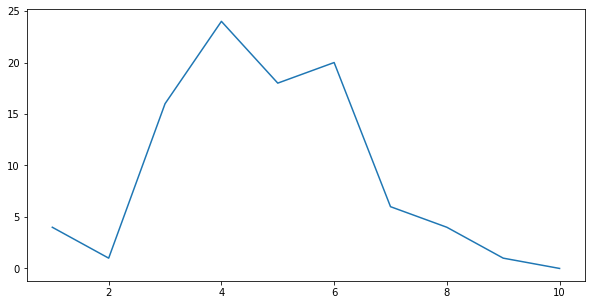

In [84]:

# Bins for electronegativity values
plt.figure(figsize=(10,5))
Electronegative_bins, Electronegative_counts = bin_counts(df, 'Electronegativity')
print(Electronegative_bins)
plt.plot(np.arange(1,11,1), Electronegative_counts)

[0.25  0.485 0.72  0.955 1.19  1.425 1.66  1.895 2.13  2.365 2.6  ]


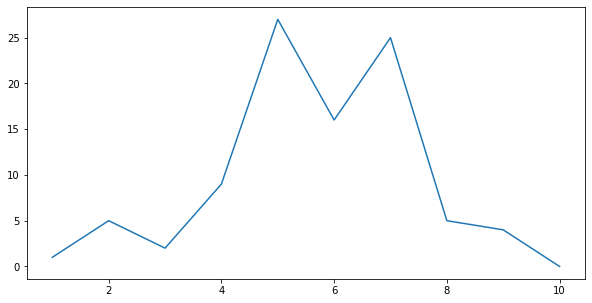

In [85]:

# Bins for Atomic Radii Values
plt.figure(figsize=(10,5))
ar_bins, ar_counts = bin_counts(df, 'Atomic Radius')
print(ar_bins)
plt.plot(np.arange(1,11,1), ar_counts)


[3.61000000e-03 4.30032490e+01 8.60028880e+01 1.29002527e+02
 1.72002166e+02 2.15001805e+02 2.58001444e+02 3.01001083e+02
 3.44000722e+02 3.87000361e+02 4.30000000e+02]


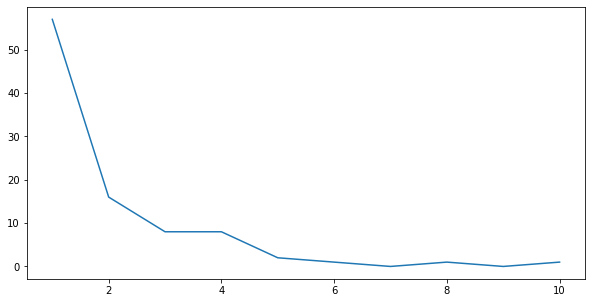

In [86]:
# Bins for Thermal Conductivity values
plt.figure(figsize=(10,5))
tc_bins, tc_counts = bin_counts(df, 'Thermal Conductivity')
print(tc_bins)
plt.plot(np.arange(1,11,1), tc_counts)

[9.0000000e-02 2.2600810e+03 4.5200720e+03 6.7800630e+03 9.0400540e+03
 1.1300045e+04 1.3560036e+04 1.5820027e+04 1.8080018e+04 2.0340009e+04
 2.2600000e+04]


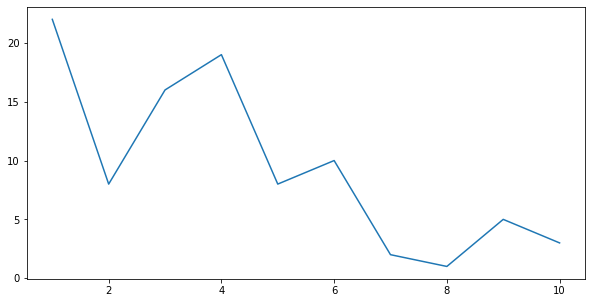

In [87]:
# Bins for density 
plt.figure(figsize=(10,5))
tc_bins, tc_counts = bin_counts(df, 'Density')
print(tc_bins)
plt.plot(np.arange(1,11,1), tc_counts)

There is similarity between Atomic radii and Electronegativity curves also the density and thermal conductivity
In general, electronegativity tends to increase as atomic radius decreases. This is due to the fact that as the atomic radius decreases, the number of electrons in the outermost shell of the atom becomes more tightly bound to the nucleus. This results in a higher electron pull towards the nucleus and a corresponding increase in electronegativity.
Here also the number of elements in each bins of electronegativty and atomic radii is kind of similar.

In [89]:
data_crystal =  pd.DataFrame(df['Crystal System'].value_counts())

In [90]:
data_crystal

,Crystal System
HCP,30
FCC,21
BCC,16
ORTH,8
RHO,6
HEX,5
SC,3
TETR,3
DC,2
MON,1


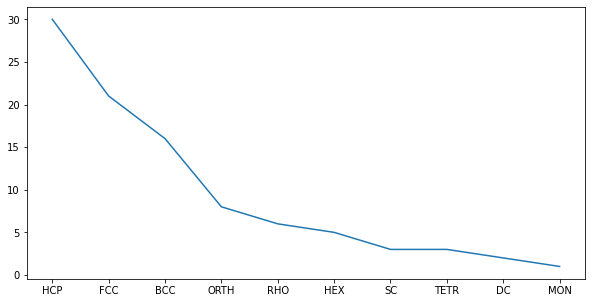

In [92]:
plt.figure(figsize=(10,5))
plt.plot(data_crystal.index, data_crystal['Crystal System'])

# Calculating the covariance 
Covariance can only be calculated for numerical variables, and the crystal system names are not numerical values. You cannot calculate covariance for categorical or nominal variables such as crystal system names.

To analyze the relationship between the crystal system and the count, you can use other methods such as contingency tables, chi-squared test, or a bar plot.

The p-value is the measure of the strength of the relationship between the two variables. If the p-value is less than a certain significance level (often 0.05), you can reject the null hypothesis and conclude that there is a relationship between the crystal system and the count.

In this case, the output of the code will give you the chi-squared statistic and the p-value, which you can use to determine whether there is a relationship between the crystal system and the count.

In [98]:
import pandas as pd
from scipy.stats import chi2_contingency

data = {'Crystal System': ['HCP', 'FCC', 'BCC', 'ORTH', 'RHO', 'HEX', 'SC', 'TETR', 'DC', 'MON'],
        'Count': [30, 21, 16, 8, 6, 5, 3, 3, 2, 1]}
df12 = pd.DataFrame(data)

table = pd.crosstab(index=df12["Crystal System"], columns="count", margins=True)

stat, p, dof, expected = chi2_contingency(table.iloc[:-1, :-1])

print("Chi-squared Statistic: ", stat)
print("p-value: ", p)

Chi-squared Statistic:  0.0
p-value:  1.0


### A p-value of 1 means that there is no significant relationship between the crystal system and the count, and a chi-squared statistic of 0 means that the observed and expected counts are exactly the same.

 ### This result indicates that the crystal system and the count are independent, meaning that the count of crystal systems does not depend on the type of crystal system. In other words, there is no relationship between the two variables.

### This result is not surprising, given that the sample size is small and the data is not normally distributed. In general, with larger sample sizes and more representative data, you would expect to see more significant results from a chi-squared test.

In [102]:
def standardize(a):                     #a here is the input data
    mean = sum(a)/len(a)                #computing mean
    var = sum((a-mean)**2)/len(a)       #computing variance
    snd = (a-mean)/(var**0.5)           #compute zero mean for normalizating data
    return snd    

In [105]:
Y =standardize(Electronegative_bins) 

In [109]:
Y

array([-1.58113883e+00, -1.26491106e+00, -9.48683298e-01, -6.32455532e-01,
       -3.16227766e-01,  1.76423792e-16,  3.16227766e-01,  6.32455532e-01,
        9.48683298e-01,  1.26491106e+00,  1.58113883e+00])

In [108]:
Electronegative_counts

[4, 1, 16, 24, 18, 20, 6, 4, 1, 0]

In [110]:
def pca(X):
  # Add a functionality of adjusting X for zero mean for each column and normalize each column using variance.
   
  # Compute covariance matrix
    C = np.dot(X.T, X) / (11-1)
  # Eigen decomposition
    eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
    X_pca = np.dot(X, eigen_vecs)
    return eigen_vecs,eigen_vals,X_pca